In [233]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [234]:
cpiDf = pd.read_csv(
    Path("resources/foodPrice.csv")
)

cpiDf.head()
cpiDf.rename({'Dairy-and-related-products': 'Dairy-products'},axis='columns',inplace = True)
cats = cpiDf.columns.to_list()
cats = [i.replace('-',' ') for i in cats if i != 'Date']
cpiDf['Date'] = pd.to_datetime(cpiDf['Date'])
cpiDf.head()

,Cereals-and-bakery-products,"Meats,-poultry,-fish,-and-eggs",Dairy-products,Fruits-and-vegetables,Other-food-at-home,Date
0,79.7,90.4,87.3,76.5,83.0,1980-01-01
1,80.6,89.7,87.8,76.0,84.3,1980-02-01
2,81.2,90.3,88.1,77.4,85.5,1980-03-01
3,82.4,89.3,88.9,80.2,86.4,1980-04-01
4,83.2,88.0,90.5,82.1,87.3,1980-05-01


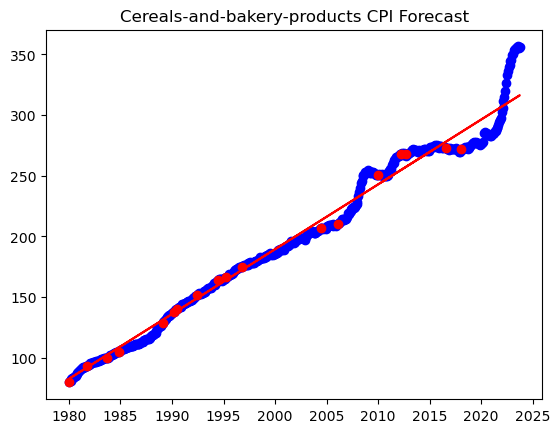

0.9790775223598379
Model's slope: 1.6927926195297816e-16
Root mean squared error: 1.0864399834684502e+18
Mean absolute error: 1.0104651779527558e+18


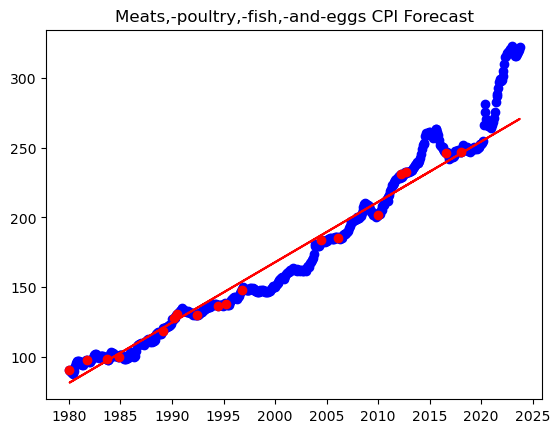

0.9453404723560578
Model's slope: 1.3734664035174595e-16
Root mean squared error: 1.0864399834684502e+18
Mean absolute error: 1.0104651779527558e+18


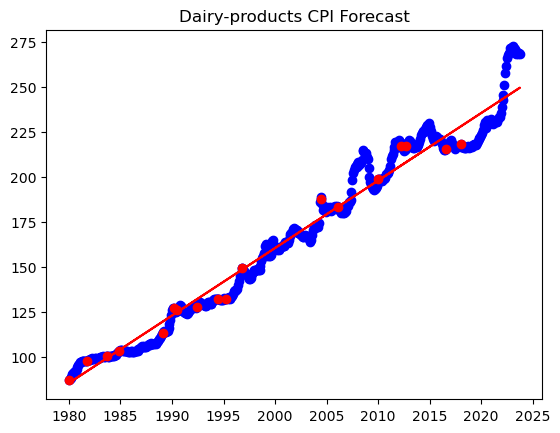

0.9711353615572585
Model's slope: 1.187917845520386e-16
Root mean squared error: 1.0864399834684502e+18
Mean absolute error: 1.0104651779527558e+18


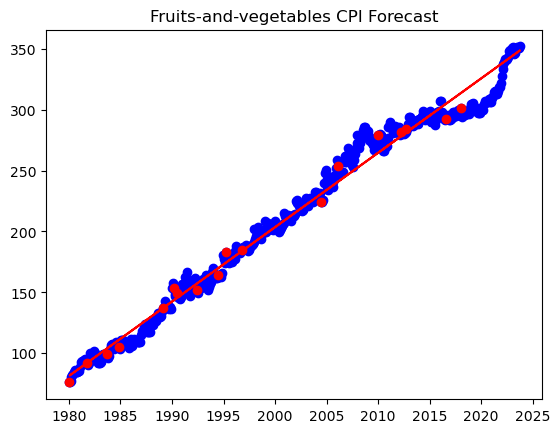

0.9829295029509579
Model's slope: 1.9360282827600273e-16
Root mean squared error: 1.0864399834684502e+18
Mean absolute error: 1.0104651779527558e+18


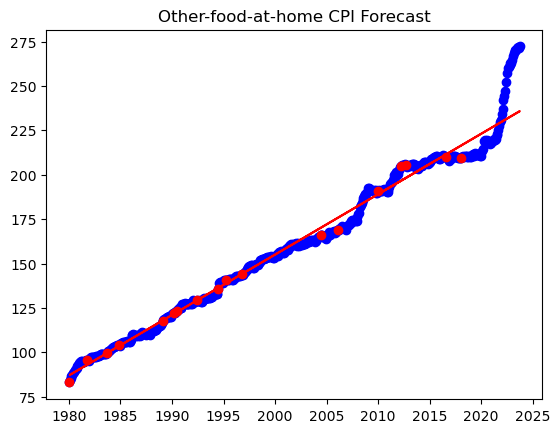

0.9738097813864774
Model's slope: 1.0780552182194538e-16
Root mean squared error: 1.0864399834684502e+18
Mean absolute error: 1.0104651779527558e+18


In [236]:

model = LinearRegression()
for cat in cpiDf.columns:
    if cat != 'Date':
        # plt.plot(cpiDf['Date'],cpiDf[cat])
        X = cpiDf['Date'].values.astype("float64").reshape(-1,1)
        y = cpiDf[cat]
        X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=18,random_state = 4)
        # X_train = cpiDf['Date'].values.astype("float64").reshape(-1,1)
        # y_train = cpiDf[cat]
        model.fit(X_train,y_train)

        preds = model.predict(X_test)
        # # Display the prediction
        # samp = pd.DataFrame(cpiDf[['Date',cat]].copy())
        # samp['Prediction'] = preds

        plt.plot(pd.to_datetime(X_test.reshape(-1)),preds,color='red')
        plt.scatter(pd.to_datetime(X.reshape(-1)),y,color='blue')
        plt.scatter(pd.to_datetime(X_train.reshape(-1)),y_train,color='red')
        plt.title(f'{cat} CPI Forecast')
        plt.show()

        print(model.score(X_test,y_test))
        mse = mean_squared_error(X_test,preds,squared = False)
        print(f"Model's slope: {model.coef_[0]}")
        print(f'Root mean squared error: {mse}')
        mae = mean_absolute_error(X_test,preds)
        print(f'Mean absolute error: {mae}')

In [232]:
## testing out multiple regression

# fin = pd.DataFrame()
# for year in np.arange(2005,2022+1):
#     spendDf = pd.read_csv(Path(f"resources/spending_{year}.csv"),index_col = 'Item')
#     spendDf.drop(columns='Year',inplace=True)
#     spendDf = spendDf.loc[cats].T
#     spendDf = spendDf.reset_index().rename({'index':'City'})
#     spendDf['Year'] = np.full(spendDf.shape[0],year)
#     fin = pd.concat([fin,spendDf],axis=0,ignore_index=True)
# spendingDf = fin.groupby('Year').mean()
# spendingDf.head()

# grpCpi = cpiDf.groupby(cpiDf.Date.dt.year).mean()
# grpCpi.head()

# yrAvgDf = pd.merge(spendingDf,grpCpi,left_index=True,right_index=True,how='left')
# yrAvgDf.head()

# import matplotlib.pyplot as plt
# model = LinearRegression()
# # model = TransformedTargetRegressor(regressor=LinearRegression(),func=np.log, inverse_func= np.exp)
# for target,factor in zip(grpCpi,spendingDf.columns):
#     # if cat != 'Date':
#     # plt.plot(cpiDf['Date'],cpiDf[cat])
#     X1 = yrAvgDf.index.to_numpy("int")
#     X2 = yrAvgDf[factor].values
#     X = np.concatenate((X1,X2),axis=0).reshape(2,-1).T
#     y = yrAvgDf[target].values
#     model.fit(X,y)

#     preds = model.predict(X)    
#     samp = pd.DataFrame(yrAvgDf[[factor,target]].copy())
#     samp.set_index(X1,drop=True,inplace=True)
#     samp['Prediction'] = preds

#     plt.plot(samp.index,preds,color='red')
#     plt.scatter(samp.index,y)
#     plt.show()
#     print(f"Model's slope: {model.coef_}")
#     print(model.score(X,y))
#     mse = mean_squared_error(y,preds,squared = False)
#     print(f'Root mean squared error: {mse}')
#     mae = mean_absolute_error(y,preds)
#     print(f'Mean absolute error: {mae}')